In [9]:
import pandas as pd

file_path = 'http://iali.in/datasets/Social_Network_Ads.csv'
network_data = pd.read_csv(melbourne_file_path) 
network_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
network_data_new =melbourne_data.dropna(axis=0)
# 0 drops rows which contain Null value
network_data_new.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
y = network_data_new.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [0]:
network_features = ['Age', 'EstimatedSalary']

In [0]:
X = network_data_new[network_features]

In [19]:
X.head(10)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [20]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor()
# Fit model Decision
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
sample_features=X.head() #for pridiction
sample_price=y.head() #for pridiction

pridicted=model.predict(sample_features)
pridicted

array([0., 0., 0., 0., 0.])

In [23]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

In [24]:
sample_price

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [25]:
df = pd.DataFrame({'Actual': sample_price, 'Predicted': pridicted})
df

,Actual,Predicted
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


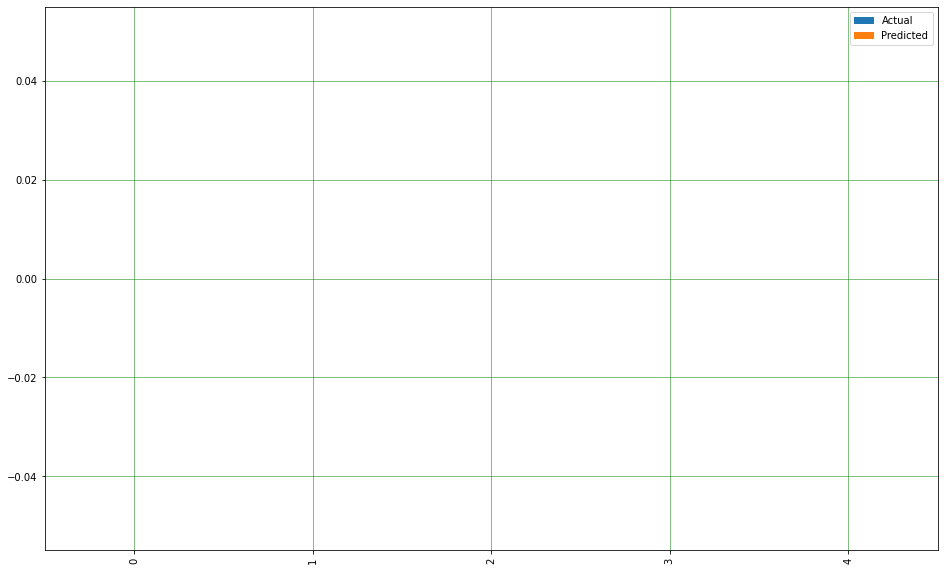

In [28]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split # Import train_test_split function

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


In [39]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
#lets see the  Values of Y that is predicted
y_pred = model.predict(x_test)
y_pred

array([0. , 0. , 0.5, 1. , 0.5, 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. ,
       1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 1. , 0. ,
       0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 1. ,
       0. , 1. , 1. , 0. , 0. , 1. , 0.5, 1. , 1. , 0. , 1. , 0. , 0. ,
       0. , 1. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 0. , 1. ,
       1. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0. ])

In [41]:
rsqure_score = model.score(x_test,y_test)
print('R^2: {}'.format(rsqure_score))

R^2: 0.23177083333333348


In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
398,0,0.0
125,0,0.0
328,1,0.5
339,1,1.0
172,0,0.5
...,...,...
347,1,1.0
41,0,0.0
180,0,0.0
132,0,0.0


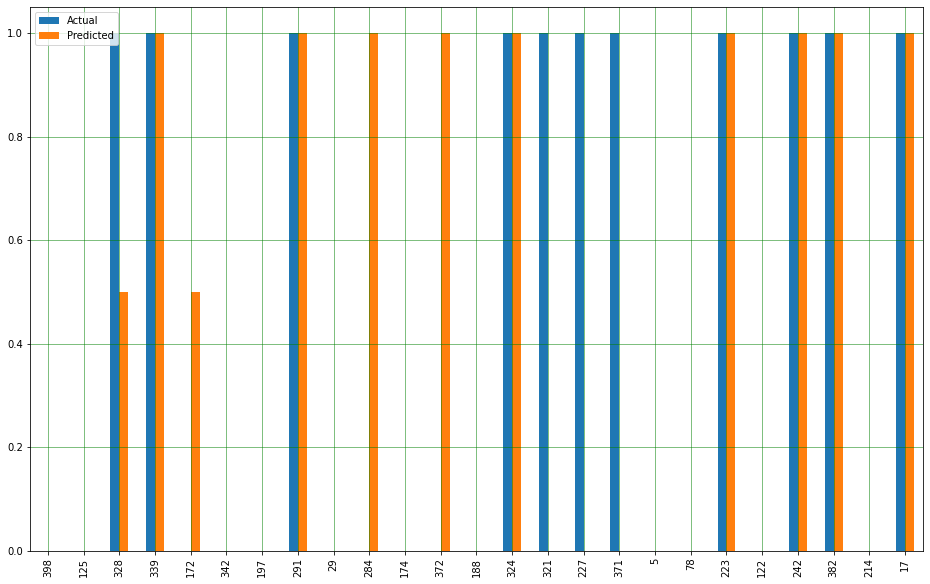

In [43]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = network_features, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

In [48]:
cv_r2_scores_rf = cross_val_score(model, x_train, y_train, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.37662338 0.51515152 0.3552492  0.49090909 0.33333333]
Mean 5-Fold R Squared: 0.4142533041366551


In [0]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()